In [77]:
import pandas as pd
#Shiv Pratap Singh, Reg No = 200968038, DA Lab Week3

In [95]:
df =  pd.read_excel('CEREALS.xlsx')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


Q1. Create a table with the 5-number summary of all the numeric attributes.

In [96]:
summary = df.describe().loc[['min','25%','50%','75%','max']]
summary

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,50.0,1.0,0.0,0.0,0.00,-1.0,-1.0,-1.0,0.0,1.0,0.5,0.25,18.042851
25%,100.0,2.0,0.0,132.5,0.75,12.0,3.0,40.0,25.0,1.0,1.0,0.67,32.932466
50%,110.0,2.5,1.0,180.0,1.75,14.5,7.0,90.0,25.0,2.0,1.0,0.75,40.253086
75%,110.0,3.0,2.0,212.5,3.00,17.0,11.0,120.0,25.0,3.0,1.0,1.00,50.780847
max,160.0,6.0,5.0,320.0,14.00,23.0,15.0,330.0,100.0,3.0,1.5,1.50,93.704912


Q2. For each of the numeric attributes (proteins upto vitamins) , identify and replace all 
missing data(indicated with -1) with the arithmetic mean of the attribute.

In [97]:
numeric = ['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']
#Shelf not taken since its categorical variable,though represented as numeric value
df[numeric].mean()

calories    107.368421
protein       2.526316
fat           1.013158
sodium      160.065789
fiber         2.048684
carbo        14.723684
sugars        6.934211
potass       93.657895
vitamins     28.289474
dtype: float64

Check the skew values before replacement

In [98]:
df[numeric].skew()

calories   -0.456487
protein     0.789645
fat         1.158183
sodium     -0.587220
fiber       2.591834
carbo      -0.419430
sugars      0.026194
potass      1.387186
vitamins    2.443523
dtype: float64

In [99]:
for i in numeric:
    df.loc[df[i] == -1,i] = df[i].mean()

Normally we replace missing values with central tendency. Check skewness of the data now, if its not skewed now. That means we made the right decision replacing the missing values in a column with its respective means.

In [100]:
df[numeric].skew()

calories   -0.456487
protein     0.789645
fat         1.158183
sodium     -0.587220
fiber       2.591834
carbo       0.270327
sugars      0.036018
potass      1.466663
vitamins    2.443523
dtype: float64

We see many skewed values >0.5 values, thus, replacing mean wasn't a good method for those features, as it clearly introduced some bias. Though, for most of the features the repacement didn't even affect the distribution.

Q3. Create a table with the 5-number summary of all the numeric attributes after treating 
missing values. Do you think the strategy used in dealing with missing values was 
effective?

In [101]:
summary_2 = df[numeric].describe().loc[['min','25%','50%','75%','max']]
summary_2

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
min,50.0,1.0,0.0,0.0,0.00,7.000000,0.0,15.00,0.0
25%,100.0,2.0,0.0,132.5,0.75,12.000000,3.0,43.75,25.0
50%,110.0,2.5,1.0,180.0,1.75,14.861842,7.0,90.00,25.0
75%,110.0,3.0,2.0,212.5,3.00,17.000000,11.0,120.00,25.0
max,160.0,6.0,5.0,320.0,14.00,23.000000,15.0,330.00,100.0


Q4. For each of the numeric attributes (proteins upto vitamins), identify and replace all 
noisy data with the median of attribute.

<AxesSubplot:>

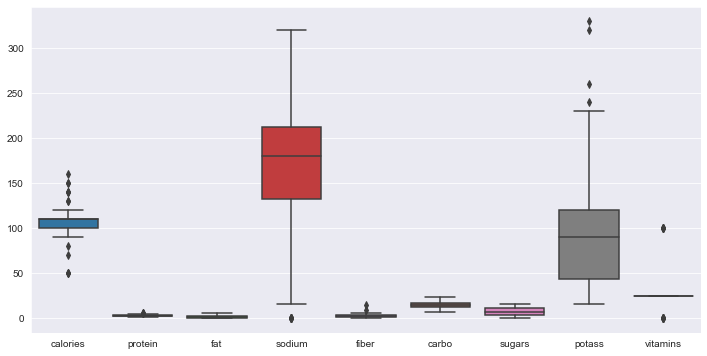

In [102]:
## first of all, let's check out the distributions
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(data = df[numeric])

We observe huge numbers of outliers in the data.

In [103]:
def ap(p):
    upper = p.quantile(0.75)
    lower = p.quantile(0.25)
    iqr =upper - lower
    # df.loc[df[numeric]>=df[numeric].quantile(0.75)+iqr*1.5]
    factor=iqr*1.5
    cond = (p>=upper+factor) | (p<=lower-factor)
    p.loc[cond] = p.median()
    return p

In [104]:
df[numeric] = df[numeric].apply(ap)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120.0,3.0,1.0,15.0,2.00,8.0,8.0,135.000000,25.0,3,1.0,1.00,33.983679
1,All-Bran,K,C,110.0,4.0,1.0,260.0,1.75,7.0,5.0,90.000000,25.0,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,110.0,4.0,0.0,140.0,1.75,8.0,0.0,90.000000,25.0,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110.0,2.0,2.0,200.0,1.00,14.0,8.0,93.657895,25.0,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110.0,2.0,2.0,180.0,1.50,10.5,10.0,70.000000,25.0,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110.0,2.0,1.0,250.0,0.00,21.0,3.0,60.000000,25.0,3,1.0,0.75,39.106174
72,Trix,G,C,110.0,1.0,1.0,140.0,0.00,13.0,12.0,25.000000,25.0,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100.0,3.0,1.0,230.0,3.00,17.0,3.0,115.000000,25.0,1,1.0,0.67,49.787445
74,Wheaties,G,C,100.0,3.0,1.0,200.0,3.00,17.0,3.0,110.000000,25.0,1,1.0,1.00,51.592193


<AxesSubplot:>

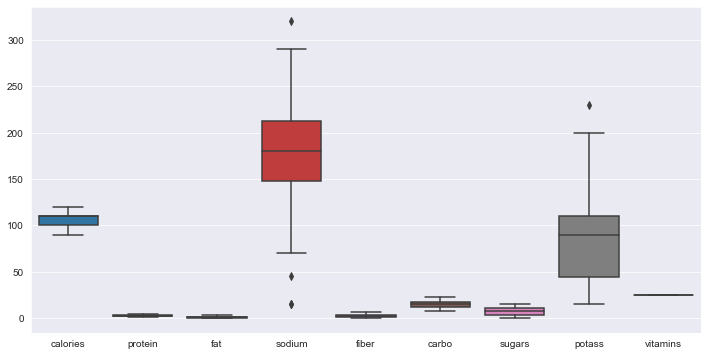

In [105]:
#Lets check how efficient our method was at removing outliers
fig, ax = plt.subplots(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(data = df[numeric])

There's a drastic reduction in the number of outliers

Q5. Create a table with the 5-number summary of all the numeric attributes after treating 
noisy values. Do you think the strategy used in dealing with noisy values was 
effective?

In [106]:
summary_3 = df[numeric].describe().loc[['min','25%','50%','75%','max']]
summary_3

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
min,90.0,1.00,0.00,15.0,0.000,7.000000,0.0,15.00,25.0
25%,100.0,2.00,0.00,147.5,0.750,12.000000,3.0,43.75,25.0
50%,110.0,2.25,1.00,180.0,1.625,14.861842,7.0,90.00,25.0
75%,110.0,3.00,1.25,212.5,3.000,17.000000,11.0,110.00,25.0
max,120.0,4.00,3.00,320.0,6.000,23.000000,15.0,230.00,25.0


Using boxplots we proved that the number of outliers in the data has been effectively reduced. The min,max range has decreased.
But the quantiles maintain their values.

Q6. Cross tabulate the type of cereal (hot vs cold) against the manufacturer.



In [107]:
pd.crosstab(index = df['mfr'], columns = df['type'])

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,4,1
P,9,0
Q,7,1
R,8,0


Q7. Which is the cereal with the best rating, worst rating.

In [110]:
df.loc[(df.rating ==df.rating.max())|(df.rating == df.rating.min())]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-Bran_with_Extra_Fiber,K,C,110.0,4.0,0.0,140.0,1.75,8.0,0.0,90.0,25.0,3,1.0,0.50,93.704912
9,Cap'n'Crunch,Q,C,120.0,1.0,2.0,220.0,0.00,12.0,12.0,35.0,25.0,2,1.0,0.75,18.042851


All-Bran_with_Extra_Fiber has highest rating of 93.7049 and
Cap'n'Crunch has lowest rating of 18.0428

Q8. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals. 

<AxesSubplot:xlabel='type', ylabel='rating'>

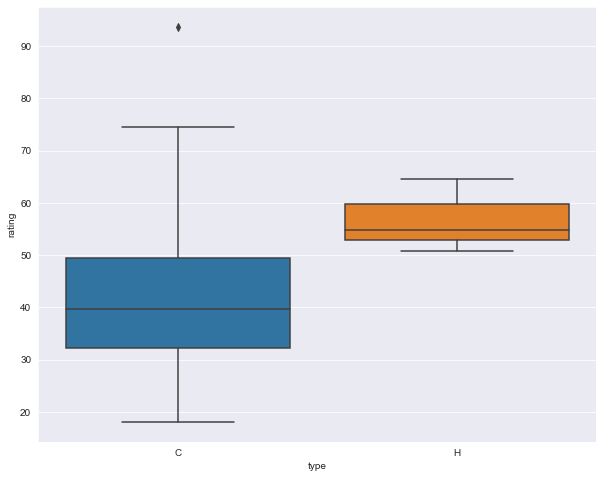

In [112]:
fig,ax = plt.subplots(figsize = [10,8])
sns.boxplot(data = df,x = 'type',y = 'rating')

Q9. Is there a relation between sugars, calories, carbs, and fat?

<AxesSubplot:>

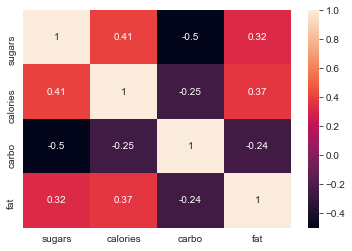

In [115]:
sns.heatmap(df[['sugars','calories','carbo','fat']].corr(),annot=True,cmap = 'rocket')

Q10. Which manufacturers produce cereal with highest calories?

In [116]:
len(df.mfr.unique())

7

In [117]:
pd.Series(df.loc[df.calories==df.calories.max()].mfr.unique())

0    Q
1    G
2    P
3    K
dtype: object

Hence, out of the 7 manufacturers 4 - Q,G,P,K produce cereals with highest calories

Q11. Use correlation tests and visualization to identify if the two variables calories and 
consumer rating associated ?

-0.520763638976708

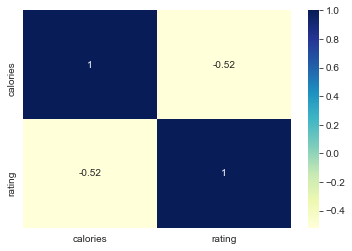

In [120]:
sns.heatmap(df[['calories','rating']].corr(), annot =  True,cmap="YlGnBu")
df.calories.corr(df.rating)

Correlation between rating and calories is -0.52, there's only a possibility of correlation. 

 Q12. Use correlation tests and visualization to identify if the two variables shelf and 
calories associated?

In [123]:
#To perform chi-square test for categorical variables
chi_square_test = pd.crosstab(index = df.calories,columns = df.shelf)
chi_square_test

shelf,1,2,3
calories,,,
90.0,3,1,3
100.0,6,4,7
110.0,11,11,20
120.0,0,5,5


In [124]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(chi_square_test) 
p
#We use the chi2_contingency function from scipy.stats. Scipy is a Python library used for scientific computing
#and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, 
# and other tasks common in science and engineering.(SCI - PY)



0.37605737989126076

Since the p-value is much larger than 0.05 threshold we cannot confidently reject the null hypothesis that there's no relationship between the 2 variables - shelf and calories

 Q13. Is there a relation between manufacturer and rating?

In [126]:
#Convert rating to categorical variable
df.rating.fillna(df.rating.mean(),inplace = True)
df['OG_Rating'] = df.rating 
df.rating = (df.rating/10).astype('int')
#Convert Ratings column from a float column to 10-point form

In [127]:
# We repeat chi-square test since we now have to find whether there's a relationship between mfr and ratings 
#both of which are categorical variables
chi_square_test = pd.crosstab(index = df.rating,columns = df.mfr)
c, p, dof, expected = chi2_contingency(chi_square_test)
p

0.00012274524580161342

Despite having a low value, the p-value is below 0.05 that means this relationship that exists between mfr and ratings is not due to chance and there exists a geniune relationship. Thus, ratings of the cereals depends on the manufacturer.

Q14. Which nutrients are essential for a good rating for a cereal?

<AxesSubplot:>

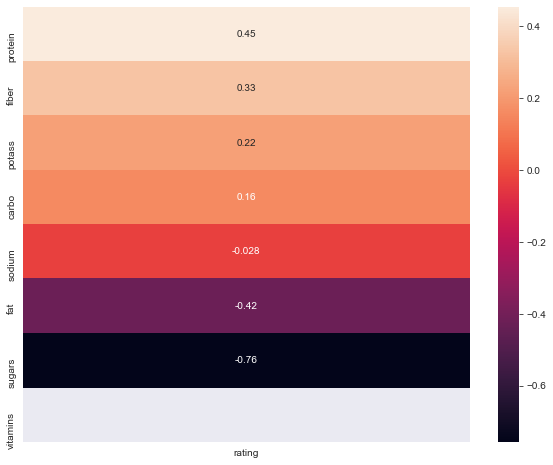

In [130]:
nutrients = df[['protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
nut_corr = nutrients.corr().loc[:,'rating'].sort_values(ascending = False)
nut_corr = pd.DataFrame(nut_corr)[1:]
fig,ax = plt.subplots(figsize = [10,8])
sns.heatmap(nut_corr , annot = True)

#sns.heatmap(df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']].corr('rating'),annot=True,cmap = "YlGnBu")

Here, we can see vitamins don't have any relation with any variable since its value remains fixed at 25 throughout.Correlations are clearly visualized here.

## Highest Correlations
Sugars -   (-0.76)

Fat -   (-0.42)

Protein -   (0.45)

Q15. Design a Linear regression model to predict the rating of a cereal based on top 3 
related nutrients. Tabulate the accuracy of the model using a 70 ,30 split.

In [131]:
X = nutrients[['sugars','protein','fat']]
y = nutrients.pop('rating')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [133]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [134]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train, y_train)
score = model_lin_reg.score(X_test, y_test)

In [135]:
score = score*100
print("Accuracy Score is: %.2f%%" %score)

Accuracy Score is: 51.17%


The score is 51.17% done.